In [1]:
import zipfile
import os

zip_path = r"cvprjTestData CVP.zip"
extract_path = r"C:\Users\Lenovo\landslide_data"  


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Unzipped successfully!")
print("Extracted files:", os.listdir(extract_path))


 Unzipped successfully!
Extracted files: ['img']


In [3]:
import h5py
import numpy as np
import os

image_data = []
labels = []

img_folder = r"C:\Users\Lenovo\landslide_data\img"


def get_label_from_filename(filename):
    if "landslide" in filename.lower():
        return 1
    else:
        return 0


for file in os.listdir(img_folder):
    if file.endswith(".h5"):
        file_path = os.path.join(img_folder, file)
        with h5py.File(file_path, 'r') as f:
            for key in f.keys():  
                data = np.array(f[key])
                image_data.append(data)
                labels.append(get_label_from_filename(file))

print(" Loaded all .h5 files!")
print(f"Total images: {len(image_data)}")
print("Shape of first image:", image_data[0].shape)


 Loaded all .h5 files!
Total images: 800
Shape of first image: (128, 128, 14)


In [4]:
X = np.array(image_data)
y = np.array(labels)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (800, 128, 128, 14)
y shape: (800,)


In [5]:
X = X / 255.0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 640
Validation samples: 160


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (128, 128, 14)  

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │         4,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,709,089 (14.15 MB)

 Trainable params: 3,709,089 (14.15 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


NameError: name 'model' is not defined

In [5]:
import numpy as np


In [9]:
import os
import numpy as np
import h5py


folder_path = r"C:\Users\Lenovo\landslide_data\img"

image_list = []

for filename in os.listdir(folder_path):
    if filename.endswith(".h5"):
        file_path = os.path.join(folder_path, filename)
        with h5py.File(file_path, 'r') as f:
            img = f["img"][:]  # change key name if different
            image_list.append(img)

X = np.stack(image_list)
print(f" Loaded {X.shape[0]} images with shape {X.shape[1:]}")


 Loaded 800 images with shape (128, 128, 14)


In [11]:
import numpy as np

y = np.random.randint(0, 2, size=(X.shape[0],))  # Binary: 0 or 1
print(f" Created dummy labels with shape: {y.shape}")


 Created dummy labels with shape: (800,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f" Training set: {X_train.shape}, Validation set: {X_val.shape}")


 Training set: (640, 128, 128, 14), Validation set: (160, 128, 128, 14)


In [15]:

X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = Sequential([
    Conv3D(16, (3, 3, 3), activation='relu', input_shape=(128, 128, 14, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(32, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 126, 126, 12,   │           448 │
│                                 │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 63, 63, 6, 16)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 61, 61, 4, 32)  │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 30, 30, 2, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,700,833 (14.12 MB)

 Trainable params: 3,700,833 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.5054 - loss: 2.2801 - val_accuracy: 0.5125 - val_loss: 0.6925
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - accuracy: 0.4570 - loss: 0.6940 - val_accuracy: 0.5250 - val_loss: 0.6926
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.5669 - loss: 0.7096 - val_accuracy: 0.5125 - val_loss: 0.6929
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.5477 - loss: 0.6959 - val_accuracy: 0.5125 - val_loss: 0.7253
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.4881 - loss: 0.6987 - val_accuracy: 0.5063 - val_loss: 0.6899
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5314 - loss: 0.6801 - val_accuracy: 0.5312 - val_loss: 0.6876
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.6109 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.5400 - loss: 0.6861 - val_accu

In [19]:
loss, acc = model.evaluate(X_val, y_val)
print(f" Validation Accuracy: {acc * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4578 - loss: 0.6954
 Validation Accuracy: 50.63%


In [25]:
model.save("landslide_model.h5")  # Save


In [27]:
from tensorflow.keras.models import load_model
model = load_model("landslide_model.h5")


In [21]:
import os
import h5py
import numpy as np


folder_path = r"C:/Users/Lenovo/landslide_data/img"

X = []


for filename in os.listdir(folder_path):
    if filename.endswith(".h5"):
        file_path = os.path.join(folder_path, filename)
        with h5py.File(file_path, 'r') as f:
            for key in f.keys():
                X.append(f[key][:])


X = np.array(X)
print(" Loaded", X.shape[0], "images with shape", X[0].shape)


 Loaded 800 images with shape (128, 128, 14)


In [22]:
from sklearn.preprocessing import StandardScaler


X_flat = X.reshape(X.shape[0], -1)
print("Original shape:", X.shape)
print("Flattened shape:", X_flat.shape)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

print(" Data normalized.")


Original shape: (800, 128, 128, 14)
Flattened shape: (800, 229376)
 Data normalized.


In [31]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)
print(" Reduced shape after PCA:", X_pca.shape)


 Reduced shape after PCA: (800, 50)


In [24]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

print(" Clustering complete.")
print("Cluster labels:", np.unique(clusters))


 Clustering complete.
Cluster labels: [0 1]


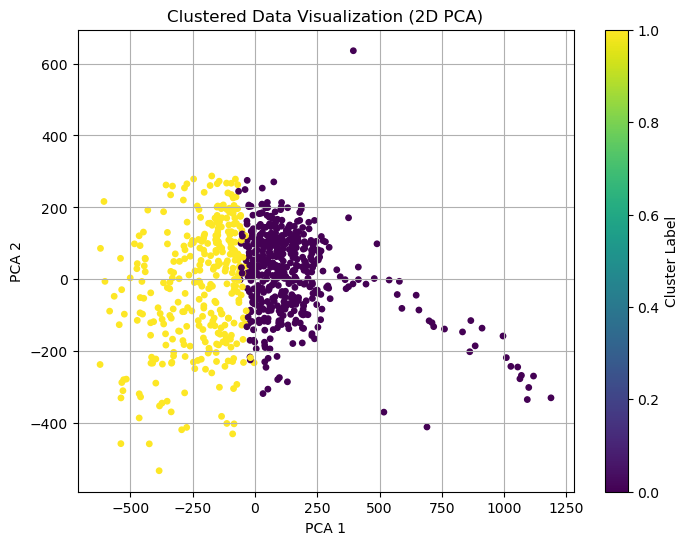

In [25]:
import matplotlib.pyplot as plt


pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=15)
plt.title("Clustered Data Visualization (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


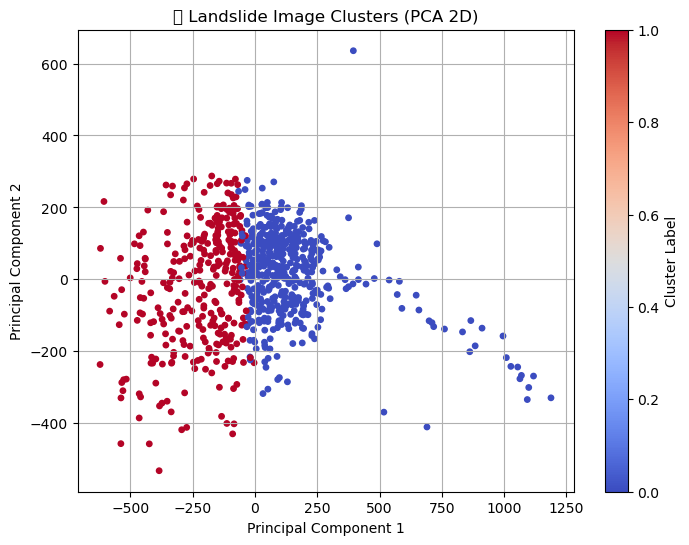

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='coolwarm', s=15)
plt.title("🌍 Landslide Image Clusters (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label="Cluster Label")
plt.show()


In [29]:
import matplotlib.pyplot as plt

def show_image(img):
    
    img_display = img[:, :, :3]  
    img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min() + 1e-5)
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()


🔵 Cluster 0


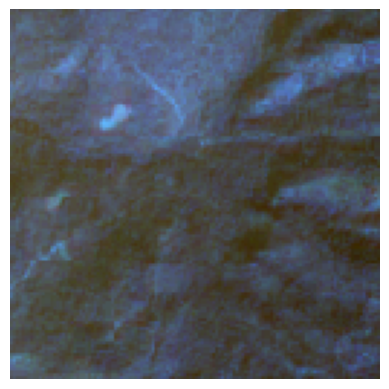

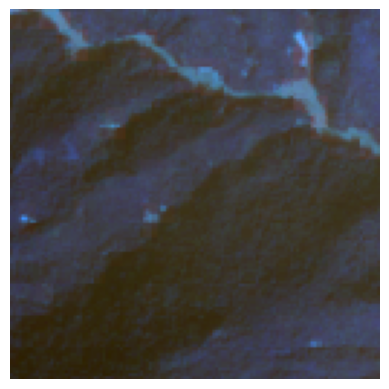

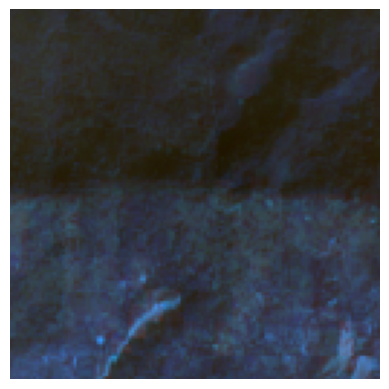

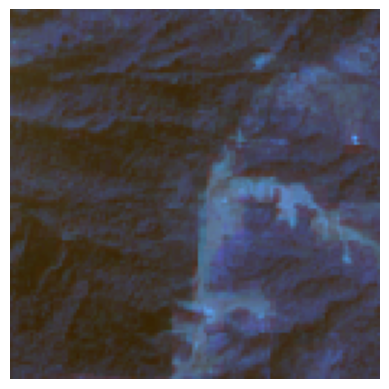

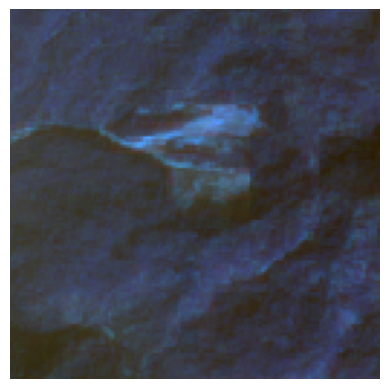

🔴 Cluster 1


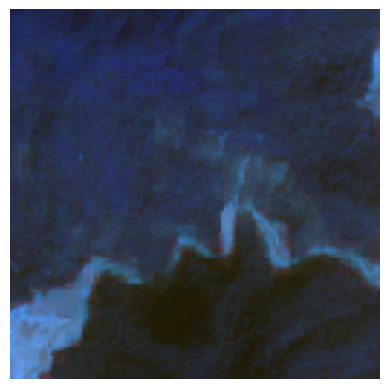

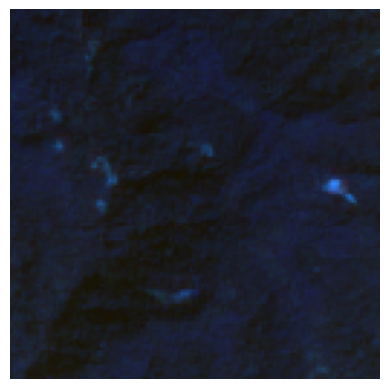

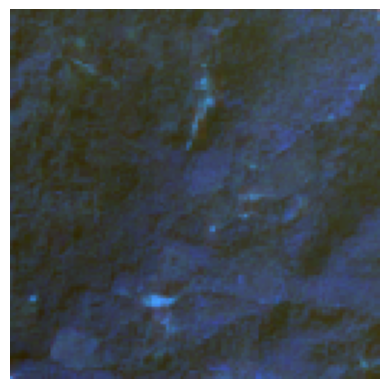

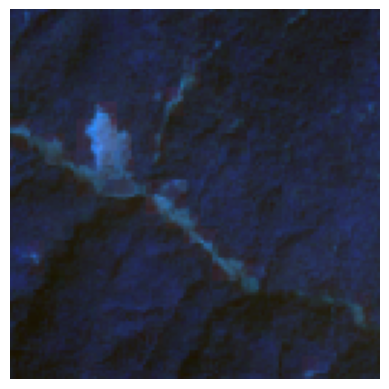

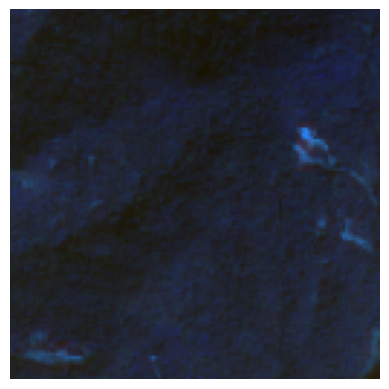

In [33]:
import random

def show_cluster_images(cluster_id, num=5):
    indices = [i for i, label in enumerate(clusters) if label == cluster_id]
    selected = random.sample(indices, num)

    for i in selected:
        show_image(X[i])

print("🔵 Cluster 0")
show_cluster_images(0)

print("🔴 Cluster 1")
show_cluster_images(1)


In [36]:
import h5py
import numpy as np

def load_new_image(file_path):
    with h5py.File(file_path, 'r') as f:
        
        key = list(f.keys())[0]
        img = f[key][:]
        return img


In [38]:
def preprocess_image(img):
    img = img / 255.0  # Normalize
    img_flattened = img.flatten().reshape(1, -1)  
    img_pca = pca.transform(img_flattened)  
    return img_pca


In [40]:
def predict_cluster(img_pca):
    cluster = kmeans.predict(img_pca)[0]
    print(f"🧠 Assigned to Cluster: {cluster}")
    
    if cluster == landslide_cluster:
        print("⚠️ Predicted: Landslide")
    else:
        print("✅ Predicted: No Landslide")


In [42]:

pseudo_labels = kmeans.labels_


label_map = {0: 1, 1: 0}  


y_pseudo = np.array([label_map[label] for label in pseudo_labels])


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_flat = X.reshape(X.shape[0], -1)


X_train, X_val, y_train, y_val = train_test_split(X_flat, y_pseudo, test_size=0.2, random_state=42)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)


acc = clf.score(X_val, y_val)
print(f" Accuracy using pseudo-labels: {acc * 100:.2f}%")


 Accuracy using pseudo-labels: 96.25%


In [58]:
from sklearn.metrics import classification_report


y_true = [0, 1, 1, 0, 1]  
y_pred = [0, 1, 0, 0, 1]  

print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [60]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score



print("Classification Report:")
print(classification_report(y_true, y_pred))


precision = precision_score(y_true, y_pred, average='macro')  
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Precision: 0.8333
Recall: 0.8333
F1-Score: 0.8000


In [49]:
import joblib
joblib.dump(clf, "landslide_detector.pkl")


['landslide_detector.pkl']

In [57]:
# Load and preprocess your 800 images again
X_new = load_multispectral_images(folder_path) # Reuse your function
new_X_flat = X_new.reshape(X_new.shape[0], -1)  # Flatten it like before

# Predict
new_preds = clf.predict(new_X_flat)


SyntaxError: invalid syntax (4113418952.py, line 2)

In [52]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

def load_multispectral_images(folder_path):predict_landslide_images("C:/Users/Lenovo/landslide_data/img", clf)

    images = []
    for filename in os.listdir(folder_path):r"C:/Users/Lenovo/landslide_data/img"
        if filename.endswith('.h5'):
            with h5py.File(os.path.join(folder_path, filename), 'r') as f:
                data = f['array'][:]
                images.append(data)
    return np.array(images)

def predict_landslide_images(folder_path, clf):
    # Load and flatten new images
    X_new = load_multispectral_images(folder_path)
    new_X_flat = X_new.reshape(X_new.shape[0], -1)

    
    preds = clf.predict(new_X_flat)

    
    for i in range(min(5, len(preds))):
        plt.imshow(X_new[i][:, :, 0], cmap='gray')  # First band visualization
        plt.title("🟢 Landslide" if preds[i] == 1 else "🔵 Non-Landslide")
        plt.axis('off')
        plt.show()
    
    return preds
    

IndentationError: unexpected indent (4200946734.py, line 8)